In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC , LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

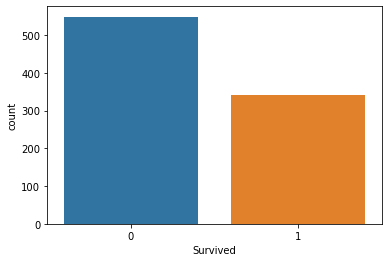

In [5]:
sns.countplot(x = 'Survived' , data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

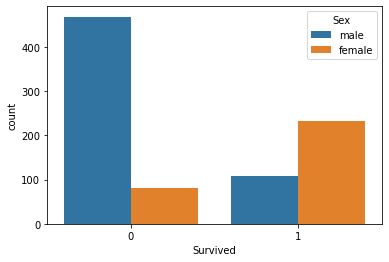

In [6]:
sns.countplot(x = 'Survived' , hue = 'Sex' ,data = df)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

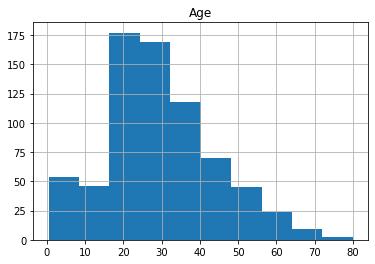

In [7]:
df.hist(column ='Age')

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

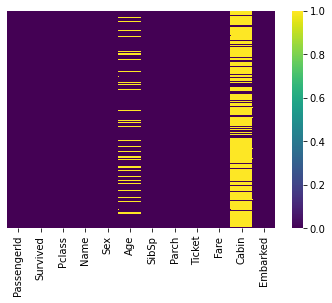

In [9]:
sns.heatmap(data = df.isnull() , cmap = 'viridis' , yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

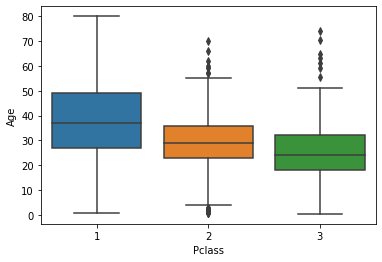

In [10]:
sns.boxplot(x='Pclass' , y='Age' , data=df)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Categorical Values --
### Categorical Data is the data that generally takes a limited number of possible values. Also, the data in the category need not be numerical, it can be textual in nature. All machine learning models are some kind of mathematical model that need numbers to work with.

In [12]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

## Nominal Data ---
### Nominal data simply names something without assigning it to an order in relation to other numbered objects or pieces of data. An example of nominal data might be a "pass" or "fail" classification for each student's test result. Nominal data provides some information about a group or set of events, even if that information is limited to mere counts.

## Ordinal Data ---
### Ordinal data, unlike nominal data, involves some order; ordinal numbers stand in relation to each other in a ranked fashion. For example, suppose you receive a survey from your favorite restaurant that asks you to provide feedback on the service you received. You can rank the quality of service as "1" for poor, "2" for below average, "3" for average, "4" for very good and "5" for excellent. The data collected by this survey are examples of ordinal data. Here the numbers assigned have an order or rank; that is, a ranking of "4” is better than a ranking of “2.”

## Which features are Categorical ? 
### These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
### Categorical: Survived, Sex, and Embarked. Ordinal: Pclass

## They have some relation between labels

In [13]:
print('-'*40)

----------------------------------------


## Which features are Numerical ?
### Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
### Continous: Age, Fare. Discrete: SibSp, Parch.



In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Mixed Data - Numerical + Alphanumerical 
### eg - Ticket , Cabin.

In [15]:
df1 = pd.read_csv('test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### What is the distribution of numerical feature value across sample.
#### This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

#### 1) Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
#### 2)Survived is a categorical feature with 0 or 1 values.
#### 3) Around 38% samples survived representative of the actual survival rate at 32%.
#### 4)Most passengers (> 75%) did not travel with parents or children.
#### 5)Nearly 30% of the passengers had siblings and/or spouse aboard.
#### 6)Fares varied significantly with few passengers (<1%) paying as high as 512 dollars.
#### 7) Few elderly passengers (<1%) within age range 65-80.

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.describe(include =['O']) ### this is capital O and may give information of categorical features

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Calic, Mr. Petar",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [18]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
df2  = df.groupby(['Ticket']).count()

In [20]:
df2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3,3
110413,3,3,3,3,3,3,3,3,3,3,3
110465,2,2,2,2,2,1,2,2,2,2,2
110564,1,1,1,1,1,1,1,1,1,1,1
110813,1,1,1,1,1,1,1,1,1,1,1
111240,1,1,1,1,1,1,1,1,1,1,1
111320,1,1,1,1,1,1,1,1,1,1,1
111361,2,2,2,2,2,2,2,2,2,2,2
111369,1,1,1,1,1,1,1,1,1,1,1


In [21]:
df['Ticket'].nunique() ## To find number of unique values in a column.

681

### These things will be performed after little bit data analysis.
#### 1. Correlating  2. Correcting  3. Completing 4. Creating 5. Classifying

### We observe that some features as relation with the survival - Pclass ,Sex , Sibsp and Parch , So we have to verify them.

In [22]:
df[['Pclass', 'Survived']].groupby(['Pclass' ],as_index = False).mean().sort_values(by =['Survived'], ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
df[['Sex'  , 'Survived']].groupby(['Sex'], as_index =False).mean().sort_values(by=['Survived'] , ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Sibsp - Number of siblings and spouse.
### Parch - Number of children and Parents

In [24]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [25]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Analyze by visualizing data-
#### A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

#### Observations -
#### 1 Infants (Age <=4) had high survival rate. 2 Oldest passengers (Age = 80) survived. 3 Large number of 15-25 year olds did not survive. 4 Most passengers are in 15-35 age range.

#### Decision -
#### 1  We should consider Age (our assumption classifying #2) in our model training. 2 Complete the Age feature for null values (completing #1).  3 We should band age groups (creating #3).


## Correlating  numerical features


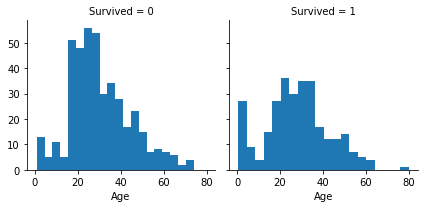

In [26]:
g = sns.FacetGrid(df , col ='Survived')
g.map(plt.hist , 'Age' , bins = 20)

## Correlating numerical and ordinal features
#### We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.
### Observations-
#### 1. Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.  2.Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2. 3.Most passengers in Pclass=1 survived. Confirms our classifying assumption #3. 4.Pclass varies in terms of Age distribution of passengers.

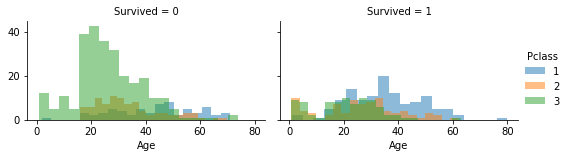

In [27]:
grid = sns.FacetGrid(df , col = 'Survived' , hue = 'Pclass', height = 2.3 , aspect = 1.6) ## row is basically hue
grid.map(plt.hist , 'Age' ,alpha = .5 , bins = 20)
grid.add_legend()

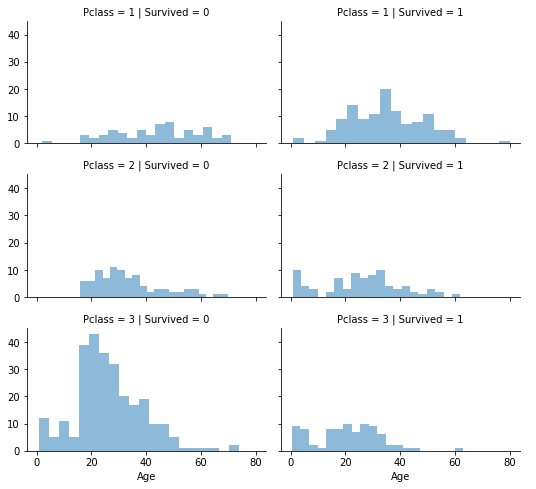

In [28]:
grid = sns.FacetGrid(df , col = 'Survived' , row = 'Pclass', height = 2.3 , aspect = 1.6) ## row is basically hue
grid.map(plt.hist , 'Age' ,alpha = .5 , bins = 20)
grid.add_legend() ### not useful

## Correlating categorical features
#### 1.Female passengers had much better survival rate than males. Confirms classifying (#1). 2.Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived. 3.Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2). 4.Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

c:\users\rakshit\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\rakshit\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


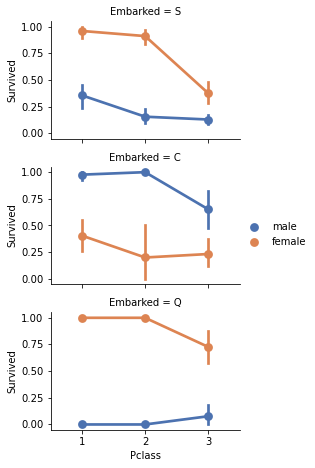

In [29]:
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6) ## embark means port of embarktion(port names Q - queenstown etc)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Correlating categorical and numerical features
### We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

#### Obsevation -
#### 1. Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges. 2.Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

c:\users\rakshit\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


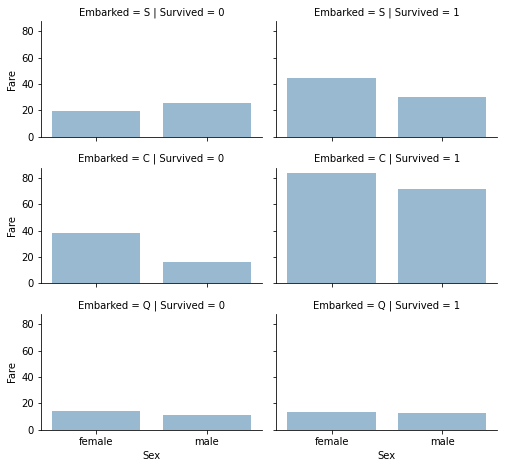

In [30]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle Data -
#### Let us now execute our decisions and assumptions for correcting, creating, and completing goals.
### Correcting by dropping features
#### Dropping Cabin and Ticket features as 1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival. 2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.

In [31]:

print("Before", df.shape, df1.shape)

train_df = df.drop(['Ticket', 'Cabin'], axis=1)
test_df = df1.drop(['Ticket', 'Cabin'], axis=1)


print("After", train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


### Correlation between Title and survived and Creating new feature from existing-

In [32]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title']= dataset.Name.str.extract('([A-Za-z]+)\.', expand = False) ### In this case before surname there is extra name so we have to keep that in mi
    
pd.crosstab(train_df['Title'] , train_df['Sex'])    ### crosstab(index , columns)
    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Converting Categorical Data (Title) to ordinal values-


In [34]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine :
    dataset['Title']= dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head(10)       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [35]:
train_df = train_df.drop(['Name' , 'PassengerId'] , axis =1)
test_df = test_df.drop(['Name' , 'PassengerId'] , axis =1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


## For Converting Categorical Column into Numerical function use Map function--

In [36]:
train_df['Sex'] = train_df['Sex'].map( {'male':0, 'female':1} )
test_df['Sex'] = test_df['Sex'].map( {'male':0, 'female':1} )

In [37]:
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## Completing Numerical Continuous Feature-
### Methods we have to complete them-
#### 1. A simple way is to generate random numbers between mean and standard deviation.
#### 2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
#### 3.  Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.
#### Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

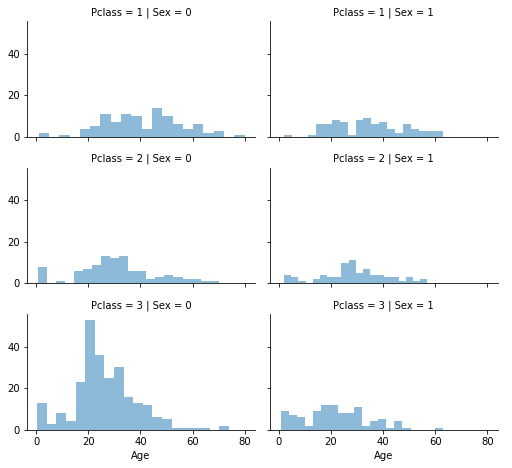

In [39]:
grid = sns.FacetGrid(train_df ,row ='Pclass' , col = 'Sex' , height = 2.2 , aspect = 1.6)
grid.map(plt.hist , 'Age' , alpha = .5 , bins = 20)
grid.add_legend()

In [40]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [41]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = ( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age']

train_df.head() #### I think this do nothing in the project

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [42]:
train_df['Age'].isnull().sum()

177

In [43]:
train_df['AgeBand']= pd.cut(train_df['Age'], 5)
train_df[['AgeBand' , 'Survived']].groupby(['AgeBand'] , as_index = False).mean().sort_values(by ='AgeBand', ascending = True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,38.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,26.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,35.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,35.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [45]:
combine = [ train_df , test_df]
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16.336, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.336) & (dataset['Age'] <= 32.252), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.252) & (dataset['Age'] <= 48.168), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.168) & (dataset['Age'] <= 64.084), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64.084, 'Age'] = 4
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"
5,0,3,0,NaN,0,0,8.4583,Q,1,NaN
6,0,1,0,3.0,0,0,51.8625,S,1,"(48.168, 64.084]"
7,0,3,0,0.0,3,1,21.0750,S,4,"(0.34, 16.336]"
8,1,3,1,1.0,0,2,11.1333,S,3,"(16.336, 32.252]"
9,1,2,1,0.0,1,0,30.0708,C,3,"(0.34, 16.336]"


In [46]:
train_df = train_df.drop(['AgeBand'], axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


## Creating new feature as family size so that we can drop Parch and Sibsp-

In [47]:
combine = [ train_df , test_df]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 ### +1 for itself

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Creating New feature to reduce variables in Familysize--

In [48]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1 , 'IsAlone'] = 1

train_df[['IsAlone' , 'Survived']].groupby(['IsAlone'] , as_index = False).mean()    ### loc is used to replace values with condition.

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [49]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [50]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


In [51]:
freq_p = train_df.Age.dropna().mode()[0] ### after dropping NA value find mode of that feature. and for completing age column nan values.
freq_p

1.0

In [52]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(freq_p)
    
train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.0,0.550000
3,3.0,0.434783
2,2.0,0.404255
1,1.0,0.344168
4,4.0,0.090909


#### We Can also an artificial feature by combining Age and Pclass

In [53]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


#### Completing values of features -

In [54]:
freq_port = train_df.Embarked.dropna().mode()[0] ### after dropping NA value find mode of that feature.
freq_port

'S'

In [55]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [56]:
test_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2.0,7.8292,Q,1,1,6.0
1,3,1,2.0,7.0000,S,3,0,6.0
2,2,0,3.0,9.6875,Q,1,1,6.0
3,3,0,1.0,8.6625,S,1,1,3.0
4,3,1,1.0,12.2875,S,3,0,3.0
5,3,0,0.0,9.2250,S,1,1,0.0
6,3,1,1.0,7.6292,Q,2,1,3.0
7,2,0,1.0,29.0000,S,1,0,2.0
8,3,1,1.0,7.2292,C,3,1,3.0
9,3,0,1.0,24.1500,S,1,0,3.0


In [57]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,7.2500,S,1,0,3.0
1,1,1,1,2.0,71.2833,C,3,0,2.0
2,1,3,1,1.0,7.9250,S,2,1,3.0
3,1,1,1,2.0,53.1000,S,3,0,2.0
4,0,3,0,2.0,8.0500,S,1,1,6.0
5,0,3,0,1.0,8.4583,Q,1,1,3.0
6,0,1,0,3.0,51.8625,S,1,1,3.0
7,0,3,0,0.0,21.0750,S,4,0,0.0
8,1,3,1,1.0,11.1333,S,3,0,3.0
9,1,2,1,0.0,30.0708,C,3,0,0.0


### Converting Embarked categorical features to numeric.

In [58]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,7.2500,0,1,0,3.0
1,1,1,1,2.0,71.2833,1,3,0,2.0
2,1,3,1,1.0,7.9250,0,2,1,3.0
3,1,1,1,2.0,53.1000,0,3,0,2.0
4,0,3,0,2.0,8.0500,0,1,1,6.0


## For Fare Feature -
### Quick Completing and Converting a Numeric feature -

In [59]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True) ### filling missing values in one line by median
test_df.head()


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2.0,7.8292,2,1,1,6.0
1,3,1,2.0,7.0000,0,3,0,6.0
2,2,0,3.0,9.6875,2,1,1,6.0
3,3,0,1.0,8.6625,0,1,1,3.0
4,3,1,1.0,12.2875,0,3,0,3.0


In [60]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) ### Creating Band as same in we create in Age Column
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [61]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,0,0,1,0,3.0
1,1,1,1,2.0,3,1,3,0,2.0
2,1,3,1,1.0,1,0,2,1,3.0
3,1,1,1,2.0,3,0,3,0,2.0
4,0,3,0,2.0,1,0,1,1,6.0
5,0,3,0,1.0,1,2,1,1,3.0
6,0,1,0,3.0,3,0,1,1,3.0
7,0,3,0,0.0,2,0,4,0,0.0
8,1,3,1,1.0,1,0,3,0,3.0
9,1,2,1,0.0,2,1,3,0,0.0


In [62]:
test_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2.0,0,2,1,1,6.0
1,3,1,2.0,0,0,3,0,6.0
2,2,0,3.0,1,2,1,1,6.0
3,3,0,1.0,1,0,1,1,3.0
4,3,1,1.0,1,0,3,0,3.0
5,3,0,0.0,1,0,1,1,0.0
6,3,1,1.0,0,2,2,1,3.0
7,2,0,1.0,2,0,1,0,2.0
8,3,1,1.0,0,1,3,1,3.0
9,3,0,1.0,2,0,1,0,3.0


## Model Prediction and Solution -

In [63]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [64]:
# Logistic Regression 
logreg = LogisticRegression()
logreg.fit(X_train , Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train , Y_train)* 100 , 2)
acc_log

80.58

In [66]:
### We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.
### Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

### 1. Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
### 2. Inversely as Pclass increases, probability of Survived=1 decreases the most.
### 3. So is Title as second highest positive correlation.
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by ='Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.205691
5,Title,0.403532
4,Embarked,0.270470
6,IsAlone,0.135805
3,Fare,-0.084340
7,Age*Class,-0.113950
2,Age,-0.275890
0,Pclass,-1.058619


In [67]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.94

In [68]:

# KNN ---- In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.4

In [69]:
 #Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


76.77

In [70]:
# Perceptron -- The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.24

In [71]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\users\rakshit\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.46

In [72]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.33

In [73]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


86.87

In [74]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.87

## Selection of Model - 

In [75]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.87
8,Decision Tree,86.87
1,KNN,84.40
0,Support Vector Machines,82.94
2,Logistic Regression,80.58
7,Linear SVC,79.46
5,Perceptron,79.24
6,Stochastic Gradient Decent,77.33
4,Naive Bayes,76.77


In [77]:
# We have deleted passenger ID so we have not framed passenger id with their survival.  
submission = pd.DataFrame({
        
        "Survived": Y_pred
    })

In [78]:
submission.head()

,Survived
0,0
1,0
2,0
3,0
4,1
